In [1]:
import warnings
warnings.filterwarnings("ignore")

from gensim.models import ldamodel

from datetime import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import entropy

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('paper')

from utils import dataset, load_bow

In [2]:
col = [
    'Publication Type', \
    'Venue', \
    'Author Full Names', \
    'Article Title', \
    'Abstract', \
    'Publication Date', \
    'Publication Year']

venues = dataset()[col]
venues = venues.dropna(subset=['Abstract'])
venues['Abstract Lemmatized'] = load_bow('25_venues')
venues = venues.dropna(subset=['Publication Date'])
venues['Date'] = (venues['Publication Date']+'-'+venues['Publication Year']).apply(lambda x: datetime.strptime(x, '%b-%Y'))
venues = venues.sort_values(by='Date')
venues.index = range(len(venues))

In [18]:
venues.iloc[6637]

Publication Type                                                       J
Venue                                                               EAAI
Author Full Names                               Zha, XF; Du, HJ; Qiu, JH
Article Title          Knowledge-based approach and system for assemb...
Abstract               Assembly is one of the most important stages f...
Publication Date                                                     Apr
Publication Year                                                    2001
Abstract Lemmatized    [most, important, stage, product, development,...
Date                                                 2001-04-01 00:00:00
Name: 6637, dtype: object

In [9]:
model_name = '60_asymmetric_auto_0.5_0.0075'
model = ldamodel.LdaModel.load(f'models/lda_models/{model_name}')

In [4]:
def get_topics(bow):
    return model.get_document_topics(model.id2word.doc2bow(bow), minimum_probability=0)
venues['LDA Distribution'] = venues['Abstract Lemmatized'].apply(lambda x: get_topics(x))

In [5]:
df = venues[['Date', 'LDA Distribution']]
date_dict = {pd.Timestamp(i): (df['Date'][df['Date'] == i].index[0], df['Date'][df['Date'] == i].index[-1]) for i in df['Date'].unique()}

# TOPIC FREQUENCE TRENDS

In [15]:
for K in range(60):
    df[f'Topic {K}'] = df['LDA Distribution'].apply(lambda x: x[K][1] if K in [y[0] for y in x] else 0)

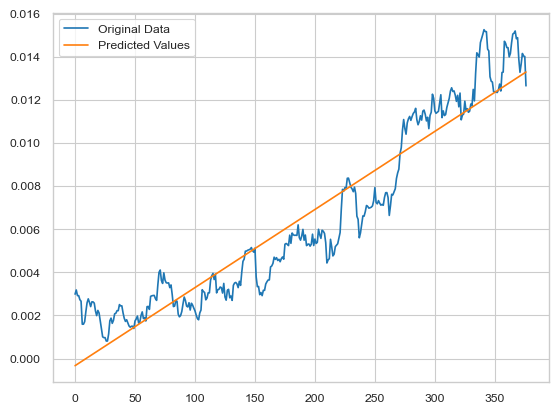

In [322]:
K = 44

data = list(((df.groupby('Date')[f'Topic {K}'].sum()/df.groupby('Date')[f'Topic {K}'].count())).rolling(12).mean().dropna())
time = np.arange(len(data)).reshape(-1, 1)

time = sm.add_constant(time)
results = sm.OLS(data, time).fit()
predicted = results.predict(time)

plt.plot(data, label="Original Data")
plt.plot(predicted, label="Predicted Values")
plt.legend()
plt.show()

In [330]:
coefs = []

for K in range(60):
    data = list(((df.groupby('Date')[f'Topic {K}'].sum()/df.groupby('Date')[f'Topic {K}'].count())))
    time = np.arange(len(data)).reshape(-1, 1)

    time = sm.add_constant(time)
    results = sm.OLS(data, time).fit()

    coefs.append((K, results.params[1], results.pvalues[1]))

largest = sorted(coefs, key=lambda x: x[1], reverse=True)[:3]
smallest = sorted(coefs, key=lambda x: x[1])[:3]

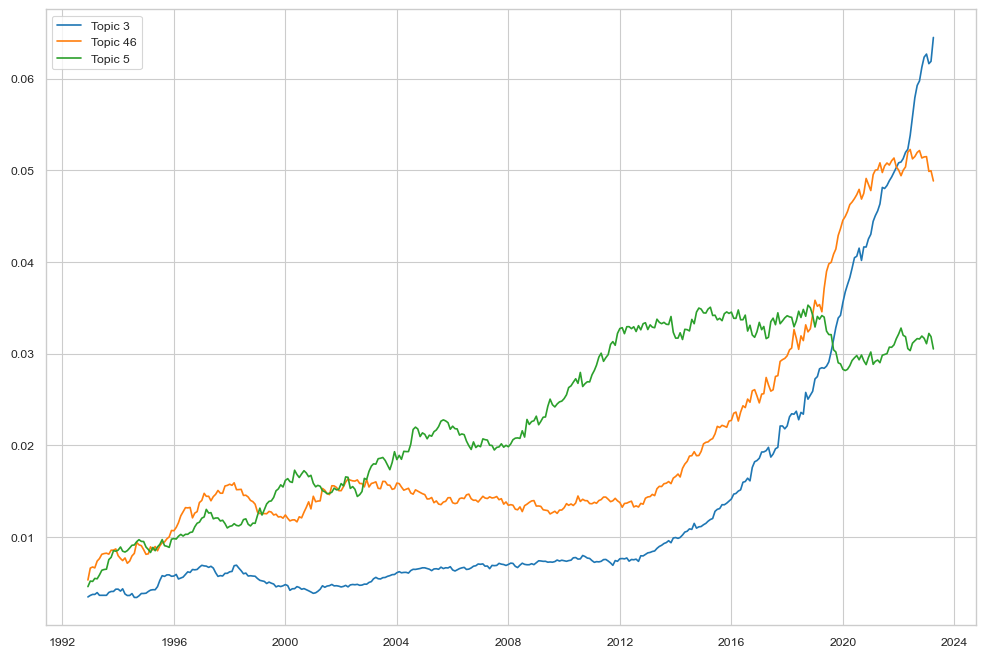

In [331]:
# plot the values for each K value in largest everything IN THE SAME PLOT without using sm

sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(figsize=(12, 8))

for K in [i[0] for i in largest]:
    series = (df.groupby('Date')[f'Topic {K}'].sum()/df.groupby('Date')[f'Topic {K}'].count()).rolling(24).mean().dropna()
    plt.plot(series, label=f'Topic {K}')

plt.legend()
plt.show()



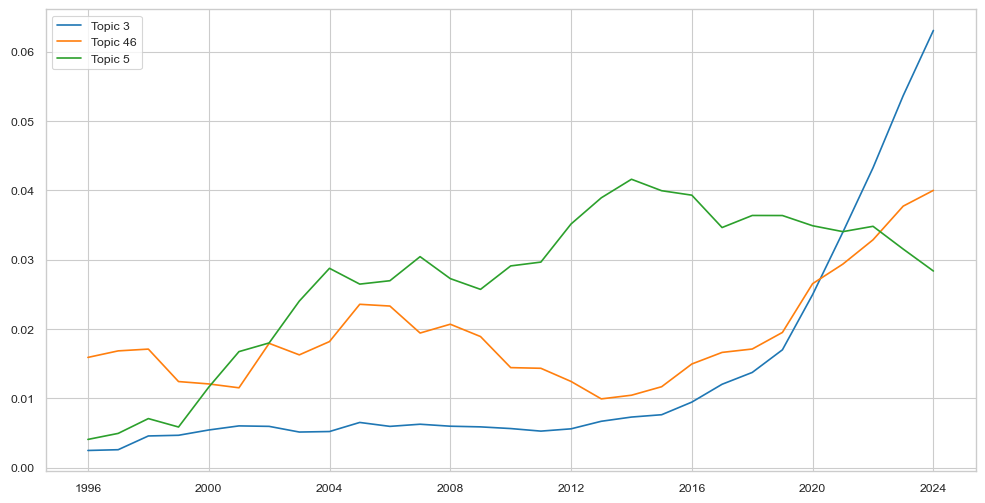

In [210]:
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(figsize=(12, 6))

for K in [i[0] for i in largest]:
    # series = (df.groupby('Date')[f'Topic {K}'].sum()/df.groupby('Date')[f'Topic {K}'].count()).rolling(24).mean().dropna()
    series = (df.groupby('Date')[f'Topic {K}'].sum()/df.groupby('Date')[f'Topic {K}'].count()).resample('A').first().rolling(5).mean().dropna()
    plt.plot(series, label=f'Topic {K}')

plt.legend()
plt.show()

In [456]:
topic_names = pd.read_csv('models/topics.csv')[['Topics', 'Labels']]


for K in range(60):
    plt.figure(figsize=(12, 6))
    series = (df.groupby('Date')[f'Topic {K}'].sum()/df.groupby('Date')[f'Topic {K}'].count()).rolling(18).mean().dropna()
    # set all plot with the same y axis
    plt.ylim(0, 0.11)
    plt.plot(series, label=topic_names.loc[K, 'Labels'])
    plt.savefig(f'plots/topic_trends/{topic_names.loc[K, "Labels"]}.png')
    plt.clf()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Topic Entropy Over Time

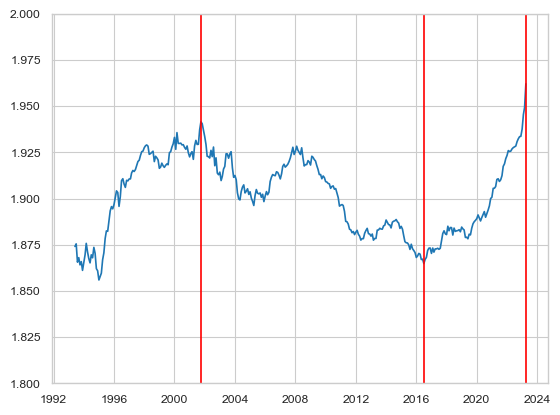

In [465]:
venues['LDA Distribution'] = df['LDA Distribution']
venues['entropy'] = [entropy([i[1] for i in x]) for x in venues['LDA Distribution']]
plt.figsize=(12, 6)
series = (venues.groupby('Date')['entropy'].sum()/venues.groupby('Date')['entropy'].count()).rolling(30).mean().dropna()
plt.plot(series)
plt.ylim(1.8, 2)

model = "rbf"
algo = rpt.Pelt(model=model).fit(series.values)
result = algo.predict(pen=15)

for i in range(1, len(result)):
    segment = series.iloc[result[i-1]:result[i]]
    if segment.mean() > segment.iloc[0]:
        plt.vlines(segment.idxmax(), 1.8, 2, color='red')
    elif segment.mean() < segment.iloc[0]:
        plt.vlines(segment.idxmin(), 1.8, 2, color='red')

plt.show()

In [467]:
coefs = []

for v in venues['Venue'].unique():
    data = list(venues[venues['Venue'] == v].groupby('Date')['entropy'].sum()/venues[venues['Venue'] == v].groupby('Date')['entropy'].count())
    time = np.arange(len(data)).reshape(-1, 1)

    time = sm.add_constant(time)
    results = sm.OLS(data, time).fit()

    if results.pvalues[1] < 0.0001:
        coefs.append((v, results.params[1]))

largest = sorted(coefs, key=lambda x: x[1], reverse=True)[:3]
smallest = sorted(coefs, key=lambda x: x[1])[:3]

largest = [i[0] for i in largest]
smallest = [i[0] for i in smallest]

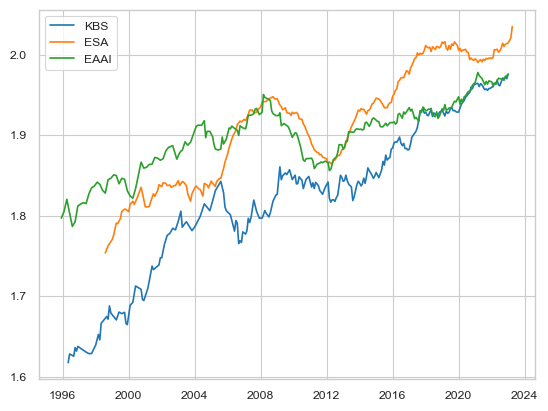

In [468]:
for v in largest:
    series = venues[venues['Venue'] == v].groupby('Date')['entropy'].mean().rolling(24).mean().dropna()
    plt.plot(series, label=v)

plt.legend()
plt.show()

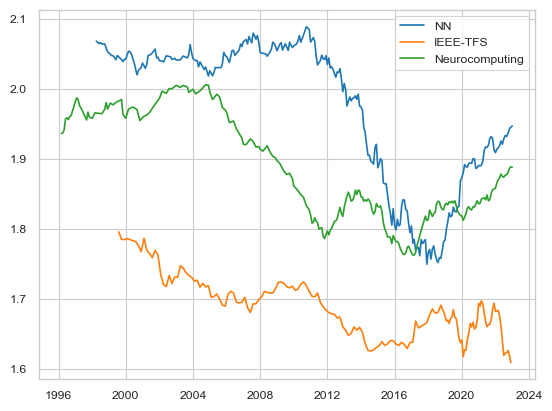

In [469]:
for v in smallest:
    series = venues[venues['Venue'] == v].groupby('Date')['entropy'].mean().rolling(24).mean().dropna()
    plt.plot(series, label=v)

plt.legend()
plt.show()

# Topic Groups Computer Vision and Language Processing

In [11]:
avg = 10

NLP_t = [23, 33, 42, 45, 49]
CV_t = [7, 8, 11, 20, 22, 45, 48]
deep_learning_t = [3, 15, 26, 32, 45, 46]
fuzzy_t = [52, 53]
genetic_t = [5, 56]

NLP_t = [f'Topic {i}' for i in NLP_t]
CV_t = [f'Topic {i}' for i in CV_t]
deep_learning_t = [f'Topic {i}' for i in deep_learning_t]
fuzzy_t = [f'Topic {i}' for i in fuzzy_t]
genetic_t = [f'Topic {i}' for i in genetic_t]

plt.figsize=(12, 8)

NLP = df[NLP_t]
NLP['Date'] = df['Date']
NLP['mean'] = NLP.mean(axis=1)
series_n = (NLP.groupby('Date')['mean'].sum()/NLP.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_n/series_n[0])

CV = df[CV_t]
CV['Date'] = df['Date']
CV['mean'] = CV.mean(axis=1)
series_c = (CV.groupby('Date')['mean'].sum()/CV.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_c/series_c[0])

deep_learning = df[deep_learning_t]
deep_learning['Date'] = df['Date']
deep_learning['mean'] = deep_learning.mean(axis=1)
series_d = (deep_learning.groupby('Date')['mean'].sum()/deep_learning.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_d/series_d[0])

fuzzy = df[fuzzy_t]
fuzzy['Date'] = df['Date']
fuzzy['mean'] = fuzzy.mean(axis=1)
series_f = (fuzzy.groupby('Date')['mean'].sum()/fuzzy.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_f/series_f[0])

genetic = df[genetic_t]
genetic['Date'] = df['Date']
genetic['mean'] = genetic.mean(axis=1)
series_g = (genetic.groupby('Date')['mean'].sum()/genetic.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_g/series_g[0])

plt.legend(['NLP', 'CV', 'deep_learning', 'fuzzy_logic', 'genetic_algorithm'])
plt.title('Normalized Moving Average of Topic Distributions')
plt.show()

NameError: name 'df' is not defined

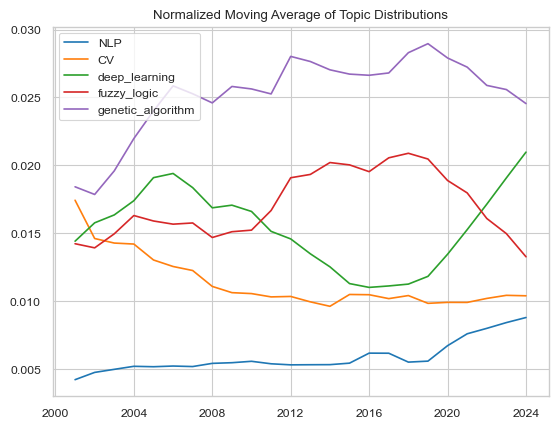

In [477]:
avg = 10

NLP_t = [23, 33, 42, 45, 49]
CV_t = [7, 8, 11, 17, 20, 22, 40, 48]
deep_learning_t = [3, 15, 26, 32, 45, 46]
# fuzzy_t = [52, 53]
# genetic_t = [5]
ml

NLP_t = [f'Topic {i}' for i in NLP_t]
CV_t = [f'Topic {i}' for i in CV_t]
deep_learning_t = [f'Topic {i}' for i in deep_learning_t]
fuzzy_t = [f'Topic {i}' for i in fuzzy_t]
genetic_t = [f'Topic {i}' for i in genetic_t]

plt.figsize=(12, 8)

NLP = df[NLP_t]
NLP['Date'] = df['Date']
NLP['mean'] = NLP.mean(axis=1)
series_n = (NLP.groupby('Date')['mean'].sum()/NLP.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_n)

CV = df[CV_t]
CV['Date'] = df['Date']
CV['mean'] = CV.mean(axis=1)
series_c = (CV.groupby('Date')['mean'].sum()/CV.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_c)

deep_learning = df[deep_learning_t]
deep_learning['Date'] = df['Date']
deep_learning['mean'] = deep_learning.mean(axis=1)
series_d = (deep_learning.groupby('Date')['mean'].sum()/deep_learning.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_d)

fuzzy = df[fuzzy_t]
fuzzy['Date'] = df['Date']
fuzzy['mean'] = fuzzy.mean(axis=1)
series_f = (fuzzy.groupby('Date')['mean'].sum()/fuzzy.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_f)

genetic = df[genetic_t]
genetic['Date'] = df['Date']
genetic['mean'] = genetic.mean(axis=1)
series_g = (genetic.groupby('Date')['mean'].sum()/genetic.groupby('Date')['mean'].count()).resample('A').first().rolling(avg).mean().dropna()
plt.plot(series_g)

plt.legend(['NLP', 'CV', 'deep_learning', 'fuzzy_logic', 'genetic_algorithm'])
plt.title('Normalized Moving Average of Topic Distributions')
plt.show()